# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [  ] YES - make available
* [ x ] NO - keep private

# Overview

There have been some debates about the best wine overall and favorites of top 19 wine enthusiasts, or which country relatively produces better wines compared to the others, for example: U.S vs European countries. We would take statistical analysis on the wine review dataset to identify the highest rated wines, while comparing between wineries, vineyards, type of grapes, prices, and regions. We would then reach the conclusion regarding which wine is the best wine. 

# Names

- Devin Junanto
- Gabriela Shirley
- Natalia Sudjana
- Shih Gau Peng

# Group Members IDs

- A15754079
- A16095578
- A16112711
- A16059733

# Research Question

1. What is the best wine overall based on the ratings given by wine enthusiasts?
2. Which continent, and country more specifically, produce the most high-rated wines? 
3. What type of grapes relatively produce the most high-rated wines?
4. Does the age (in year) of the wine as well as the price determine the wine ratings?
5. Which wines are good recommendations to the wine tasters based on their ‘winery’ and ‘types of grapes’ preferences?
6. Predict the points given to a new wine based on its winery, variety (type of grapes), country, continent, age, and price.

## Background and Prior Work

Winer are ever changing in relation to time. People’s taste buds vary but there may be a similarity of tastes once we analyze our big data sets. Every county, province, state, and country offers a breadth of wine varietal. Thus, through this project, we put high interest to identify which region produces the high-rated wines based on the points given by nineteen wine enthusiasts.

Based on some prior works that we looked into, the best wine overall is Promontory 2013 from Napa Valley, U.S.2. While from another source, Chateau Montelena Napa Valley Chardonnay 2016 from Napa Valley, U.S.3 is on the top of the list, with another similar wine type named Chateau Leoville Barton St. Julien 2016 from France that also placed first out of 100 on a different source4. By comparing these top three sources from the internet, we could see how different their answers to the question “What is the best wine overall?”. Looking at varying sources, we could not rely on one as each source would have different research techniques to build up their lists. Therefore, as to fulfill our team’s curiosity of the real wine ratings and countries that produce them, we would analyze the “Wine Reviews” dataset1 from 2018 to come up with answers to our research questions.

The wine datasets from Kaggle gathered as much as 130,000 wines which contain several variables such as the variety, winery, price, description, and ratings as well as where they were produced which would help us analyze the findings and recommend wines to the wine tasters . We would like to gather what we have learned in class and use that knowledge to wrangle and analyze data until we come to a conclusion, while we are taking into account the people's privacy.

References (include links):

1) https://www.kaggle.com/zynicide/wine-reviews#winemag-data_first150k.csv

2) https://robbreport.com/best-of-the-best/2019-best-wine-285174

3) https://vinepair.com/articles/best-wines-2019/

4) https://top100.winespectator.com/lists/


# Hypothesis


1. We hypothesize that the type of wines that wine testers prefer come from they type of grape called Chardonnay as the type of grapes most preferred as well as the highest rated wine being the Chateau Montelena Napa Valley Chardonnay 2016. 
2. We hypothesize as the wine ages more, they increase in value in terms of quality and price which can increase the ratings of the wine as more wine enthusiasts enjoy an aged wine.
3. We hypothesize that Europe as a continent and Russia as a country produces the highest rated wines as they are well known for their wines as well as Russia being the most populated country in Europe.

# Dataset(s)

Dataset Name: Wine Reviews 2018

Link to the dataset: https://www.kaggle.com/zynicide/wine-reviews#winemag-data-130k-v2.csv

Number of observations: 130,000 rows, 14 columns

Description: this dataset was scraped from WineEnthusiast around June 2017, and updated around November 2017 which contains 130,000 wine reviews with variety, location, winery, price, and descriptions.

# Setup

##### 1.1 Import library

In [1]:
import numpy as np
import gzip
import urllib.request
import tarfile
import random
import string
from copy import deepcopy
import pandas as pd
from collections import defaultdict
import json
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import seaborn as sns
%matplotlib notebook

##### 1.2 Read data from json file

In [2]:
df_wine = pd.read_json("winemag-data-130k-v2.json")

##### 1.3 Check column labels

In [3]:
df_wine.columns.values

array(['country', 'description', 'designation', 'points', 'price',
       'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype=object)

# Data Cleaning

##### 2.1 Remove unnecessary columns

In [4]:
df_wine = df_wine.drop(['province', 'region_1', 'region_2', 'description', 'taster_twitter_handle'], axis=1)

In [5]:
df_wine

,country,designation,points,price,taster_name,title,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,None,87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Ars In Vitro,87,15.0,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,Belsito,87,16.0,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,None,87,24.0,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Shine,87,12.0,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,Les Natures,87,27.0,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


##### 2.2 Dropping all the none values

In [6]:
df_wine = df_wine.dropna(subset = ['country', 'points', 'price', 'title', 'variety', 'winery'])

##### 2.3 Get the continent based on the country given

In [7]:
def continent(country):
    if country in ['US', 'Canada', 'Mexico']:
        return 'North America'
    elif country in ['France', 'Italy', 'Spain', 'Portugal', 'Austria', 'Germany', 'Greece', 'Hungary', 'Bulgaria', 'Romania'
                     , 'Turkey', 'Slovenia', 'Georgia', 'England', 'Croatia', 'Moldova', 'Ukraine', 'Macedonia', 'Czech Republic'
                     , 'Serbia', 'Cyprus', 'Switzerland', 'Luxembourg', 'Bosnia and Herzegovina', 'Armenia', 'Slovakia']:
        return 'Europe'
    elif country in ['Chile', 'Argentina', 'Uruguay', 'Brazil', 'Peru']:
        return 'South America'
    elif country in ['Israel', 'India', 'China']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand']:
        return 'Oceania'
    elif country in ['South Africa', 'Egypt', 'Morocco']:
        return 'Africa'
    else:
        return np.nan

In [8]:
df_wine['continent'] = df_wine['country'].apply(continent)

C:\Users\d3v1n\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### 2.4 Get the year and age from the title of the wine

In [9]:
def getYear(string):
    splitStr = []
    splitStr = string.split(' ')
    for a in splitStr:
        if a.isnumeric() == True:
            if int(a) >= 1934 and int(a) <= 2020:
                return a
            else:
                continue
        else:
            continue
    return np.nan

In [10]:
df_wine['year'] = df_wine['title'].apply(getYear)

C:\Users\d3v1n\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
def getAge(year):
    if type(year) == float:
        return np.nan
    else:
        age = 2018 - int(year)
        return age

In [12]:
df_wine['age'] = df_wine['year'].apply(getAge)

C:\Users\d3v1n\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### 2.5 Get the description of the data

In [13]:
df_wine.head()

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
1,Portugal,Avidagos,87,15.0,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Europe,2011,7.0
2,US,None,87,14.0,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,North America,2013,5.0
3,US,Reserve Late Harvest,87,13.0,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,North America,2013,5.0
4,US,Vintner's Reserve Wild Child Block,87,65.0,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,North America,2012,6.0
5,Spain,Ars In Vitro,87,15.0,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,Europe,2011,7.0


# Data Analysis & Results

##### 3.1 Get the average of wine ratings

In [14]:
df_wine['points'].mean()

88.42172600587189

##### 3.2 Get the number of wine tasters

In [15]:
df_wine['taster_name'].value_counts().count()

19

##### 3.3 Get the number of the wine title

In [16]:
df_wine['title'].value_counts().count()

110582

##### 3.4 Get the number of the winery

In [17]:
df_wine['winery'].value_counts().count()

15843

##### 3.5 Get the number of the country

In [18]:
df_wine['country'].value_counts().count()

42

##### 3.6 Get the average rating that each wine taster gives to get a sense of their overall standard

In [19]:
taster = []
taster = df_wine['taster_name'].value_counts().keys().to_list()
average_taster = []
for a in taster:
    average_taster.append(df_wine[df_wine['taster_name'] == a].points.mean())
df_taster = pd.DataFrame({'taster_name':taster, 'points':average_taster})
df_taster = df_taster.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_taster = df_taster.set_index('taster_name')

In [20]:
df_taster

,points
taster_name,
Anne Krebiehl MW,90.612570
Matt Kettmann,90.033991
Virginie Boone,89.216998
Mike DeSimone,89.095528
Paul Gregutt,89.087396
Kerin O’Keefe,88.908750
Sean P. Sullivan,88.756751
Jim Gordon,88.625989
Roger Voss,88.606137


##### 3.7 Get the continents that produce the best wines based on the wine tasters' ratings

In [21]:
continent = []
continent = df_wine['continent'].value_counts().keys().to_list()
average_continent = []
for a in continent:
    average_continent.append(df_wine[df_wine['continent'] == a].points.mean())
df_continent = pd.DataFrame({'continent':continent, 'points':average_continent})
df_continent = df_continent.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_continent = df_continent.set_index('continent')

In [22]:
df_continent

,points
continent,
Europe,88.574005
North America,88.565920
Asia,88.529058
Oceania,88.487745
Africa,87.847086
South America,86.579408


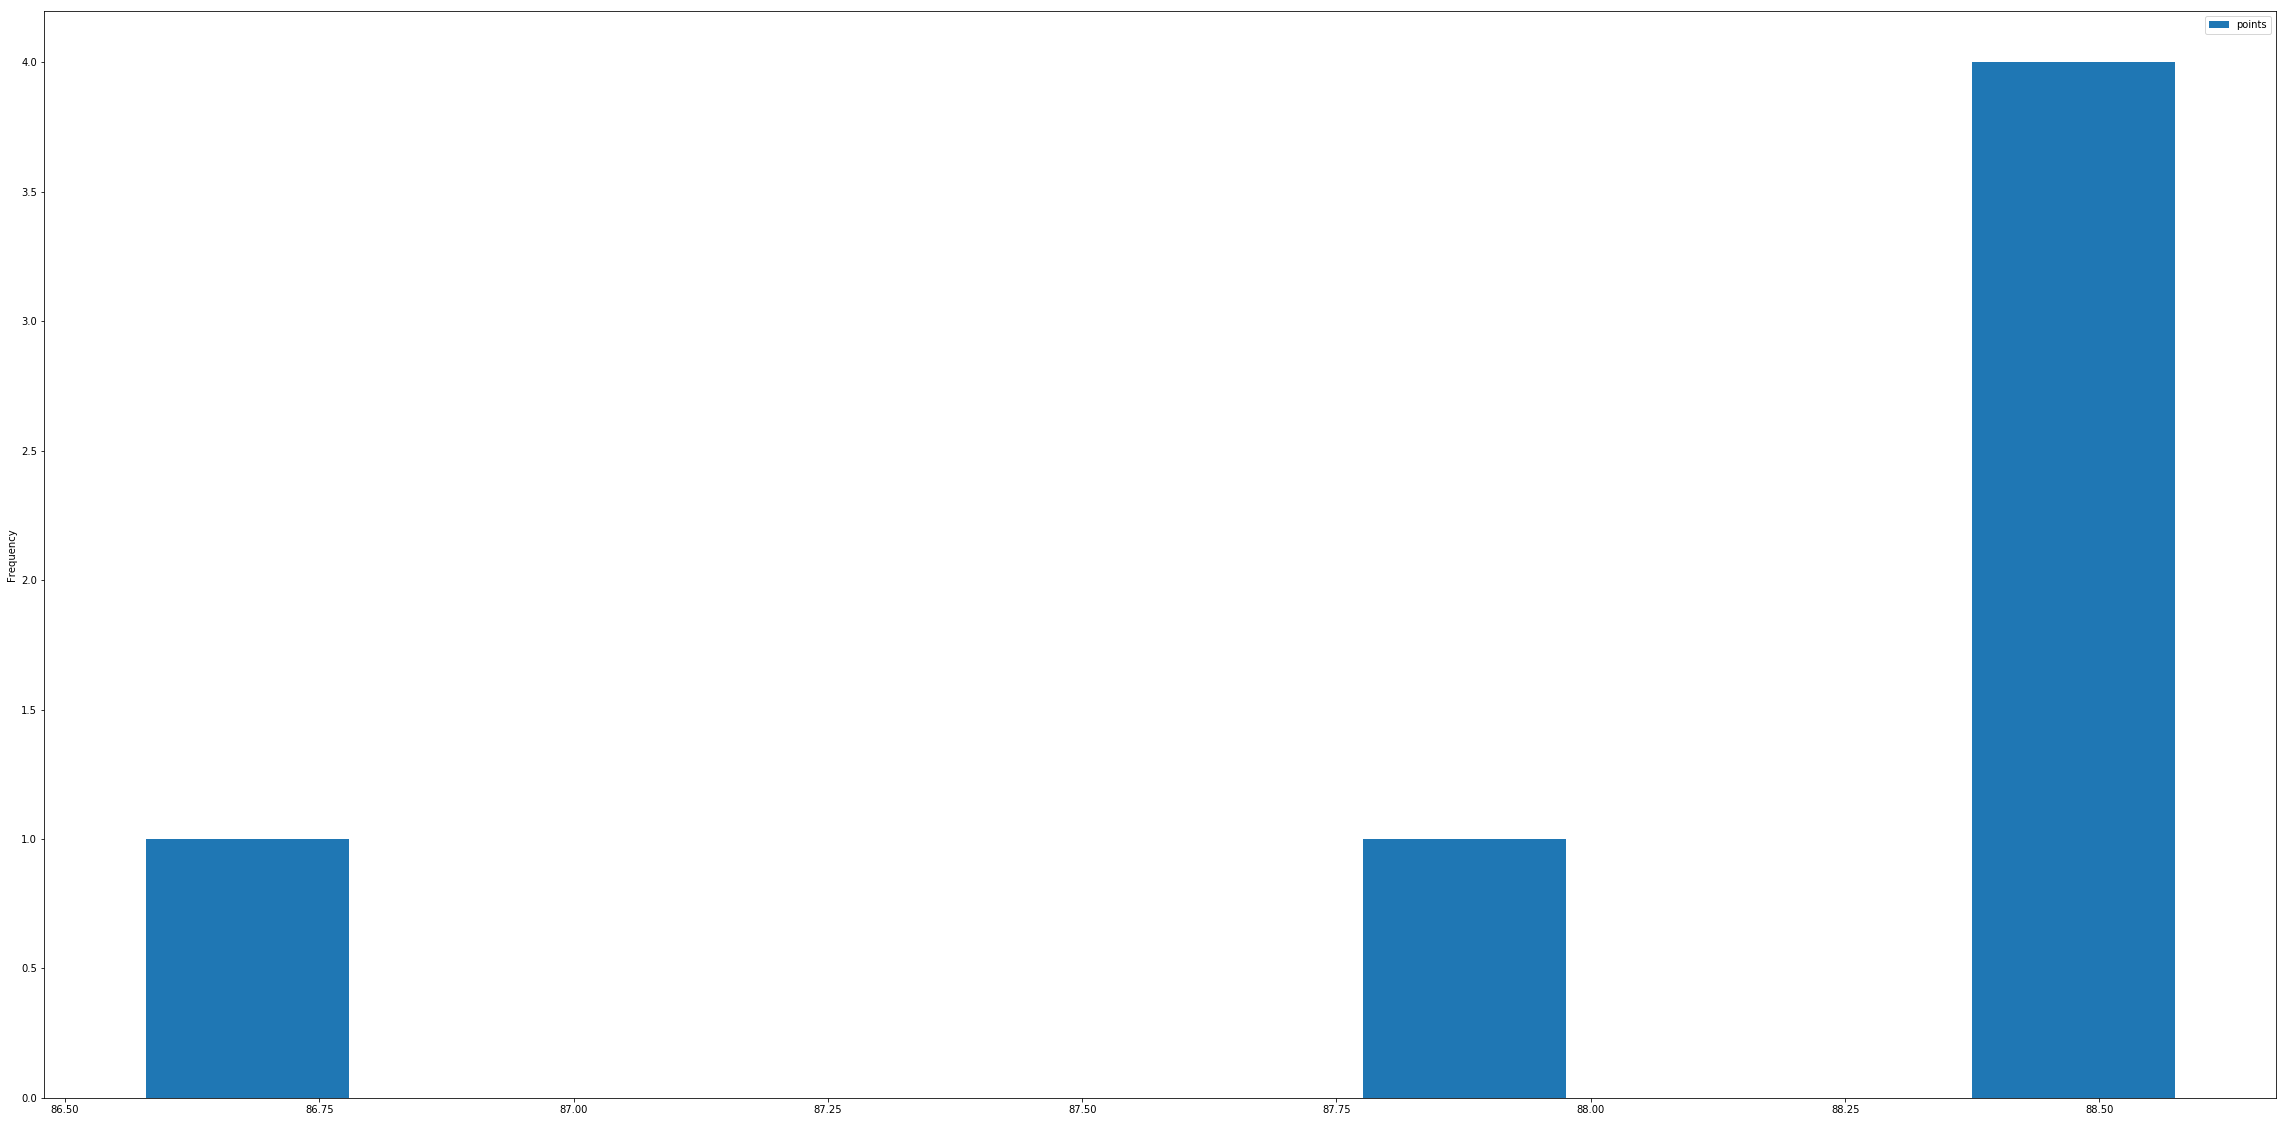

In [23]:
df_continent.plot(kind='hist', figsize=(40,20))

##### 3.8 Get the countries that produce the best wines based on the wine tasters' ratings

In [24]:
country = []
country = df_wine['country'].value_counts().keys().to_list()
average_country = []
for a in country:
    average_country.append(df_wine[df_wine['country'] == a].points.mean())
df_country = pd.DataFrame({'country':country, 'points':average_country})
df_country = df_country.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_country = df_country.set_index('country')

In [25]:
df_country

,points
country,
England,91.550725
India,90.222222
Austria,90.190782
Germany,89.836321
Canada,89.377953
Hungary,89.165517
China,89.000000
France,88.734867
Luxembourg,88.666667


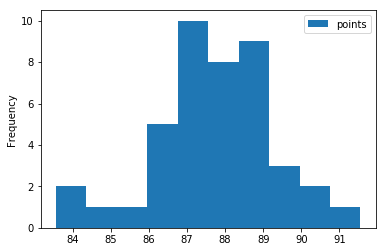

In [26]:
df_country.plot(kind='hist')

##### 3.9 Get the wineries that produce the best wines based on the wine tasters' ratings

In [27]:
winery = df_wine['winery'].unique()
winery

array(['Quinta dos Avidagos', 'Rainstorm', 'St. Julian', ...,
       'Mas de Pampelonne', 'Bodegas Eidosela', 'Penedo Borges'],
      dtype=object)

In [28]:
avg1 = []
for i in winery:
    avg1.append(df_wine[df_wine.winery == i]['points'].mean())

In [29]:
wavg_points = {'Winery': winery, 'Average Points': avg1} 

wavg_points = pd.DataFrame(wavg_points) 
 
wavg_points = wavg_points.sort_values(by=['Average Points'], ascending=False)

wavg_points

,Winery,Average Points
10782,Araujo,98.000000
11469,Clos de Tart,98.000000
6697,Château Angélus,97.000000
15598,Ovid,97.000000
14753,J.L. Chave,97.000000
15599,Gandona,97.000000
6702,Château Cheval Blanc,97.000000
15304,Château d'Yquem,97.000000
7376,Salon,96.800000
1224,Tenuta dell'Ornellaia,96.700000


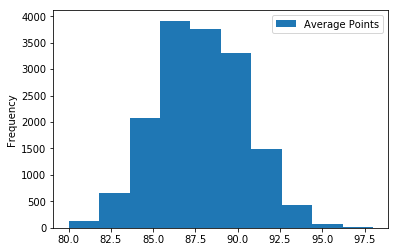

In [30]:
wavg_points.plot(kind='hist')

##### 3.10 Get the best type of grapes based on the wine tasters' ratings

In [31]:
grapes = df_wine['variety'].unique()
grapes

array(['Portuguese Red', 'Pinot Gris', 'Riesling', 'Pinot Noir',
       'Tempranillo-Merlot', 'Frappato', 'Gewürztraminer',
       'Cabernet Sauvignon', 'Chardonnay', 'Malbec', 'Tempranillo Blend',
       'Meritage', 'Red Blend', 'White Blend', 'Merlot', "Nero d'Avola",
       'Chenin Blanc', 'Sauvignon Blanc', 'Viognier-Chardonnay',
       'Primitivo', 'Catarratto', 'Gamay', 'Inzolia', 'Petit Verdot',
       'Monica', 'Bordeaux-style White Blend', 'Grillo', 'Sangiovese',
       'Cabernet Franc', 'Champagne Blend', 'Bordeaux-style Red Blend',
       'Aglianico', 'Petite Sirah', 'Carmenère', 'Albariño',
       'Petit Manseng', 'Rosé', 'Zinfandel', 'Vernaccia', 'Rosato',
       'Grüner Veltliner', 'Viognier', 'Vermentino', 'Grenache Blanc',
       'Syrah', 'Nebbiolo', 'Shiraz-Cabernet Sauvignon', 'Pinot Blanc',
       'Alsace white blend', 'Barbera', 'Rhône-style Red Blend',
       'Portuguese White', 'Graciano', 'Tannat-Cabernet', 'Sauvignon',
       'Torrontés', 'Prugnolo Gentile', 'G-

In [32]:
avg = []
for i in grapes:
    avg.append(df_wine[df_wine.variety == i]['points'].mean())

In [33]:
gavg_points = {'Grapes':grapes, 'Average Points': avg} 

gavg_points = pd.DataFrame(gavg_points) 
 
gavg_points = gavg_points.sort_values(by=['Average Points'], ascending=False)
gavg_points

,Grapes,Average Points
473,Terrantez,95.000000
383,Tinta del Pais,95.000000
620,Gelber Traminer,95.000000
474,Bual,94.333333
646,Sercial,94.000000
548,Riesling-Chardonnay,94.000000
666,Garnacha-Cariñena,93.000000
635,Roviello,93.000000
487,Blauburgunder,93.000000
663,Ramisco,93.000000


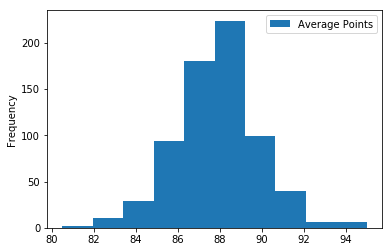

In [34]:
gavg_points.plot(kind='hist')

##### 3.11 Get the best wines overall based on the wine tasters' ratings

In [35]:
wine = df_wine['title'].unique()
wine

array(['Quinta dos Avidagos 2011 Avidagos Red (Douro)',
       'Rainstorm 2013 Pinot Gris (Willamette Valley)',
       'St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore)',
       ..., 'Domaine Gresser 2013 Kritt Gewurztraminer (Alsace)',
       'Domaine Marcel Deiss 2012 Pinot Gris (Alsace)',
       'Domaine Schoffit 2012 Lieu-dit Harth Cuvée Caroline Gewurztraminer (Alsace)'],
      dtype=object)

In [36]:
avg = []
for i in wine:
    avg.append(df_wine[df_wine.title == i]['points'].mean())

In [37]:
wine_avg_points = {'Wine':wine, 'Average Points': avg} 

wine_avg_points = pd.DataFrame(wine_avg_points) 
 
wine_avg_points = wine_avg_points.sort_values(by=['Average Points'], ascending=False)

wine_avg_points[wine_avg_points['Average Points'] == 100]

,Wine,Average Points
96215,Château Lafite Rothschild 2010 Pauillac,100.0
33063,Krug 2002 Brut (Champagne),100.0
6784,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,100.0
52035,Château Léoville Barton 2010 Saint-Julien,100.0
35485,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,100.0
78364,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,100.0
97921,Charles Smith 2006 Royal City Syrah (Columbia ...,100.0
96218,Château Léoville Las Cases 2010 Saint-Julien,100.0
78363,Louis Roederer 2008 Cristal Vintage Brut (Cha...,100.0
96217,Château Cheval Blanc 2010 Saint-Émilion,100.0


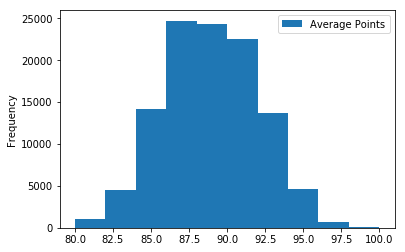

In [38]:
wine_avg_points.plot(kind='hist')

##### 3.12 Find out if age (in year) determines the the wine quality (represented by its score)

In [39]:
age = []
age = df_wine['age'].value_counts().keys().to_list()
average_age = []
for a in age:
    average_age.append(df_wine[df_wine['age'] == a].points.mean())
df_age = pd.DataFrame({'age':age, 'points':average_age})
df_age = df_age.sort_values(by=['age'], ascending=True).reset_index(drop=True)
df_age = df_age.set_index('age')

In [40]:
df_age

,points
age,
1.0,85.545455
2.0,87.673158
3.0,88.524997
4.0,88.889419
5.0,88.976493
6.0,88.759365
7.0,88.238370
8.0,88.193156
9.0,88.273299


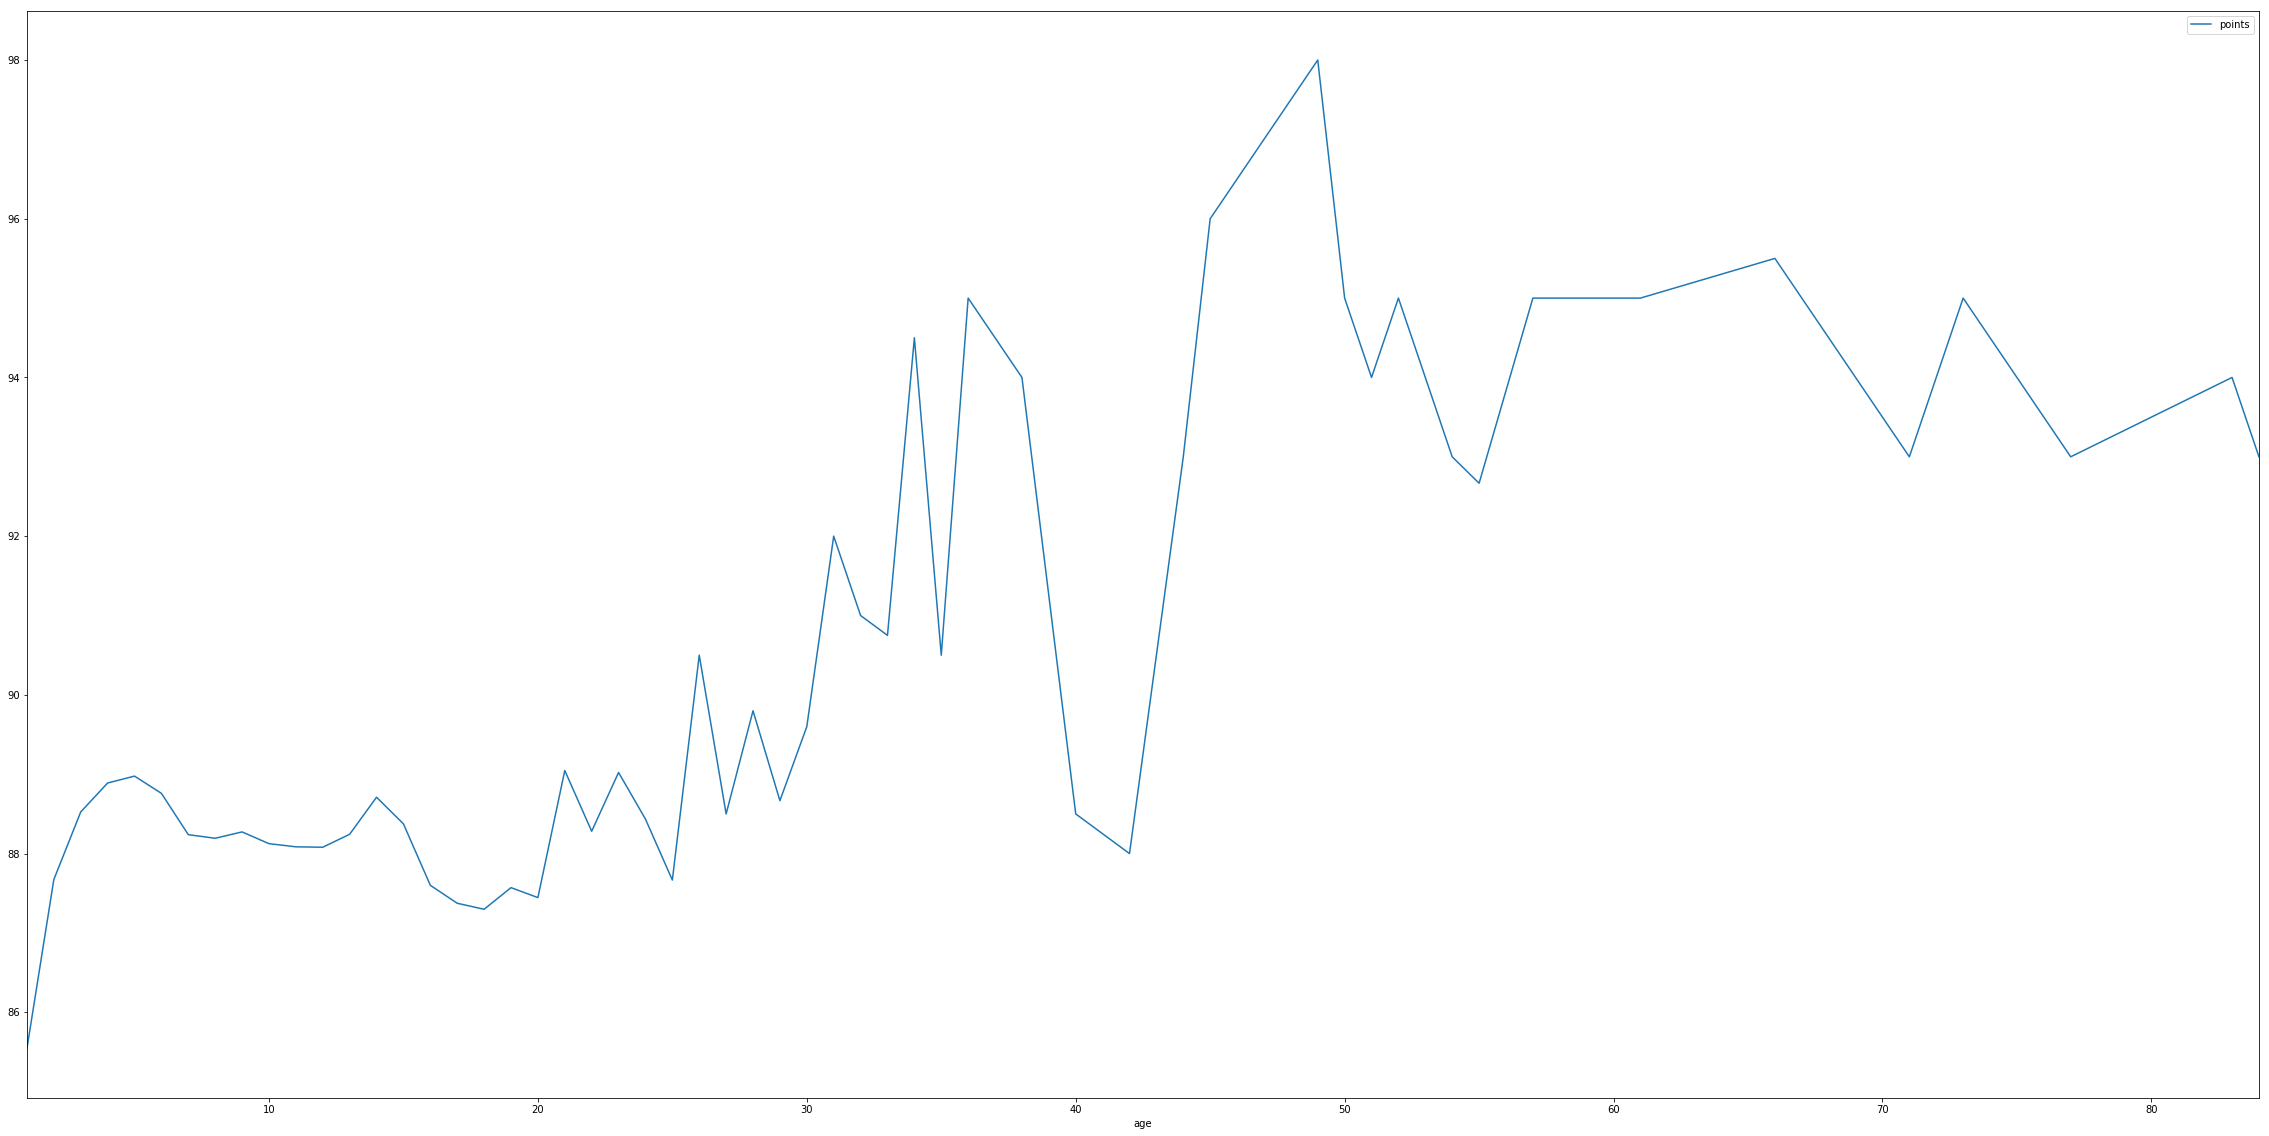

In [41]:
df_age.plot(kind='line', figsize=(40,20))

Analyzing the data comparing the points of the wines based on their age. Even though there are some extreme data and outliers, such as the significant decrease in points for wines of 40 years old, we can still see the gradual increase in points for wines from 0 years-old to around 50 years-old. After that, the points start to decrease as the wines’ age increases. The graph shows a distribution similar to a Weibull distribution.

##### 3.13 Find out if price (in USD) determines the the wine quality (represented by its score)

In [42]:
price = []
price = df_wine['price'].value_counts().keys().to_list()
average_price = []
for a in price:
    average_price.append(df_wine[df_wine['price'] == a].points.mean())
df_price = pd.DataFrame({'price':price, 'points':average_price})
df_price = df_price.sort_values(by=['price'], ascending=True).reset_index(drop=True)
df_price = df_price.set_index('price')

In [43]:
df_price

,points
price,
4.0,84.272727
5.0,83.586957
6.0,84.347458
7.0,84.450346
8.0,84.628924
9.0,85.036594
10.0,85.239314
11.0,85.471074
12.0,85.806968


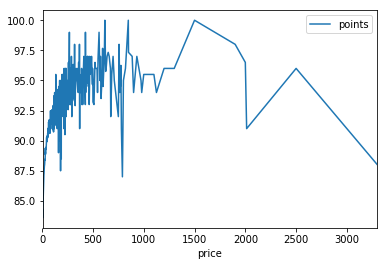

In [44]:
df_price.plot(kind='line')

Analyzing the data comparing the points of the wines based on their price. There is no very clear distribution of this data. In other words, with the same price, there can be both very high or very low points given. It would be very difficult (or unlikely) to see the pattern of points by looking only at the price.

##### 3.14 Give suggestion to each wine taster based on their preferred winery and variety

In [45]:
def getSuggestion(dfWinery, dfVariety, tasterName):
    return df_wine.loc[((df_wine['winery'] == dfWinery.index.tolist()[0])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[1])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[2])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[3])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[4])
                                  | (df_wine['winery'] == dfWinery.index.tolist()[0])
                                  | (df_wine['variety'] == dfVariety.index.tolist()[1])
                                  | (df_wine['variety'] == dfVariety.index.tolist()[2])
                                  | (df_wine['variety'] == dfVariety.index.tolist()[3])
                                  | (df_wine['variety'] == dfVariety.index.tolist()[4]))
                                 & (df_wine['taster_name'] != tasterName)]

Wine suggestion list for Roger Voss

In [46]:
df_voss = df_wine.loc[df_wine['taster_name'] == 'Roger Voss']
df_voss = df_voss.reset_index(drop=True)

In [47]:
winery_voss = []
winery_voss = df_voss['winery'].value_counts().keys().to_list()
average_winery_voss = []
for a in winery_voss:
    average_winery_voss.append(df_voss[df_voss['winery'] == a].points.mean())
df_winery_voss = pd.DataFrame({'winery':winery_voss, 'points':average_winery_voss})
df_winery_voss = df_winery_voss.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_voss = df_winery_voss.set_index('winery')

In [48]:
variety_voss = []
variety_voss = df_voss['variety'].value_counts().keys().to_list()
average_variety_voss = []
for a in variety_voss:
    average_variety_voss.append(df_voss[df_voss['variety'] == a].points.mean())
df_variety_voss = pd.DataFrame({'variety':variety_voss, 'points':average_variety_voss})
df_variety_voss = df_variety_voss.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_voss = df_variety_voss.set_index('variety')

In [49]:
df_suggestion_voss = getSuggestion(df_winery_voss, df_variety_voss, 'Roger Voss')
df_suggestion_voss = df_suggestion_voss.sort_values(by=['points'], ascending=False).head()
df_suggestion_voss

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
75556,France,Le Mesnil Blanc de Blancs Brut,96,216.0,None,Salon 1985 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,Europe,1985,33.0
18792,France,Le Mesnil Blanc de Blancs Brut,93,200.0,Joe Czerwinski,Salon 1988 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,Europe,1988,30.0
65796,Germany,Trocken,90,25.0,None,Knipser 2008 Trocken Chardonnay Weissburgunder...,Chardonnay Weissburgunder,Knipser,Europe,2008,10.0


Wine suggestion list for Michael Schachner

In [50]:
df_schachner = df_wine.loc[df_wine['taster_name'] == 'Michael Schachner']
df_schachner = df_schachner.reset_index(drop=True)

In [51]:
winery_schachner = []
winery_schachner = df_schachner['winery'].value_counts().keys().to_list()
average_winery_schachner = []
for a in winery_schachner:
    average_winery_schachner.append(df_schachner[df_schachner['winery'] == a].points.mean())
df_winery_schachner = pd.DataFrame({'winery':winery_schachner, 'points':average_winery_schachner})
df_winery_schachner = df_winery_schachner.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_schachner = df_winery_schachner.set_index('winery')

In [52]:
variety_schachner = []
variety_schachner = df_schachner['variety'].value_counts().keys().to_list()
average_variety_schachner = []
for a in variety_schachner:
    average_variety_schachner.append(df_schachner[df_schachner['variety'] == a].points.mean())
df_variety_schachner = pd.DataFrame({'variety':variety_schachner, 'points':average_variety_schachner})
df_variety_schachner = df_variety_schachner.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_schachner = df_variety_schachner.set_index('variety')

In [53]:
df_suggestion_schachner = getSuggestion(df_winery_schachner, df_variety_schachner, 'Michael Schachner')
df_suggestion_schachner = df_suggestion_schachner.sort_values(by=['points'], ascending=False).head()
df_suggestion_schachner

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
39286,Italy,Masseto,100,460.0,None,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia,Europe,2007,11.0
79104,Italy,Masseto,99,250.0,None,Tenuta dell'Ornellaia 2004 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia,Europe,2004,14.0
79105,Italy,Ornellaia,98,175.0,None,Tenuta dell'Ornellaia 2004 Ornellaia (Bolgher...,Red Blend,Tenuta dell'Ornellaia,Europe,2004,14.0
45801,Italy,Ornellaia,97,200.0,None,Tenuta dell'Ornellaia 2006 Ornellaia (Bolgher...,Red Blend,Tenuta dell'Ornellaia,Europe,2006,12.0
1564,Italy,Ornellaia,97,215.0,None,Tenuta dell'Ornellaia 2008 Ornellaia (Bolgher...,Red Blend,Tenuta dell'Ornellaia,Europe,2008,10.0


Wine suggestion list for Kerin O’Keefe

In [54]:
df_keefe = df_wine.loc[df_wine['taster_name'] == 'Kerin O’Keefe']
df_keefe = df_keefe.reset_index(drop=True)

In [55]:
winery_keefe = []
winery_keefe = df_keefe['winery'].value_counts().keys().to_list()
average_winery_keefe = []
for a in winery_keefe:
    average_winery_keefe.append(df_keefe[df_keefe['winery'] == a].points.mean())
df_winery_keefe = pd.DataFrame({'winery':winery_keefe, 'points':average_winery_keefe})
df_winery_keefe = df_winery_keefe.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_keefe = df_winery_keefe.set_index('winery')

In [56]:
variety_keefe = []
variety_keefe = df_keefe['variety'].value_counts().keys().to_list()
average_variety_keefe = []
for a in variety_keefe:
    average_variety_keefe.append(df_keefe[df_keefe['variety'] == a].points.mean())
df_variety_keefe = pd.DataFrame({'variety':variety_keefe, 'points':average_variety_keefe})
df_variety_keefe = df_variety_keefe.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_keefe = df_variety_keefe.set_index('variety')

In [57]:
df_suggestion_keefe = getSuggestion(df_winery_keefe, df_variety_keefe, 'Kerin O’Keefe')
df_suggestion_keefe = df_suggestion_keefe.sort_values(by=['points'], ascending=False).head()
df_suggestion_keefe

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
79108,Italy,Paleo,96,105.0,None,Le Macchiole 2004 Paleo Cabernet Franc (Toscana),Cabernet Franc,Le Macchiole,Europe,2004,14.0
39293,Italy,Paleo,96,125.0,None,Le Macchiole 2006 Paleo Cabernet Franc (Toscana),Cabernet Franc,Le Macchiole,Europe,2006,12.0
52631,Italy,Riserva,96,400.0,None,Biondi Santi 2001 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi,Europe,2001,17.0
83370,US,None,95,90.0,None,Merryvale 2008 Cabernet Franc (Napa Valley),Cabernet Franc,Merryvale,North America,2008,10.0
109418,Italy,Dedicato a Walter,95,90.0,None,Poggio al Tesoro 2006 Dedicato a Walter Cabern...,Cabernet Franc,Poggio al Tesoro,Europe,2006,12.0


Wine suggestion list for Virginie Boone

In [58]:
df_boone = df_wine.loc[df_wine['taster_name'] == 'Virginie Boone']
df_boone = df_boone.reset_index(drop=True)

In [59]:
winery_boone = []
winery_boone = df_boone['winery'].value_counts().keys().to_list()
average_winery_boone = []
for a in winery_boone:
    average_winery_boone.append(df_boone[df_boone['winery'] == a].points.mean())
df_winery_boone = pd.DataFrame({'winery':winery_boone, 'points':average_winery_boone})
df_winery_boone = df_winery_boone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_boone = df_winery_boone.set_index('winery')

In [60]:
variety_boone = []
variety_boone = df_boone['variety'].value_counts().keys().to_list()
average_variety_boone = []
for a in variety_boone:
    average_variety_boone.append(df_boone[df_boone['variety'] == a].points.mean())
df_variety_boone = pd.DataFrame({'variety':variety_boone, 'points':average_variety_boone})
df_variety_boone = df_variety_boone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_boone = df_variety_boone.set_index('variety')

In [61]:
df_suggestion_boone = getSuggestion(df_winery_boone, df_variety_boone, 'Virginie Boone')
df_suggestion_boone = df_suggestion_boone.sort_values(by=['points'], ascending=False).head()
df_suggestion_boone

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
103115,US,None,95,65.0,None,La Jota Vineyard 2009 Cabernet Sauvignon (Howe...,Cabernet Sauvignon,La Jota Vineyard,North America,2009,9.0
118069,US,None,95,55.0,None,La Jota Vineyard 2009 Merlot (Howell Mountain),Merlot,La Jota Vineyard,North America,2009,9.0
14352,US,Proprietary Red Wine,95,82.0,None,Alpha Omega 2006 Proprietary Red Wine Red (Nap...,Bordeaux-style Red Blend,Alpha Omega,North America,2006,12.0
76584,Argentina,Iscay,94,75.0,Michael Schachner,Trapiche 2011 Iscay Syrah-Viognier (Mendoza),Syrah-Viognier,Trapiche,South America,2011,7.0
103120,US,None,94,75.0,None,La Jota Vineyard 2009 Cabernet Franc (Howell M...,Cabernet Franc,La Jota Vineyard,North America,2009,9.0


Wine suggestion list for Paul Gregutt

In [62]:
df_gregutt = df_wine.loc[df_wine['taster_name'] == 'Paul Gregutt']
df_gregutt = df_gregutt.reset_index(drop=True)

In [63]:
winery_gregutt = []
winery_gregutt = df_gregutt['winery'].value_counts().keys().to_list()
average_winery_gregutt = []
for a in winery_gregutt:
    average_winery_gregutt.append(df_gregutt[df_gregutt['winery'] == a].points.mean())
df_winery_gregutt = pd.DataFrame({'winery':winery_gregutt, 'points':average_winery_gregutt})
df_winery_gregutt = df_winery_gregutt.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_gregutt = df_winery_gregutt.set_index('winery')

In [64]:
variety_gregutt = []
variety_gregutt = df_gregutt['variety'].value_counts().keys().to_list()
average_variety_gregutt = []
for a in variety_gregutt:
    average_variety_gregutt.append(df_gregutt[df_gregutt['variety'] == a].points.mean())
df_variety_gregutt = pd.DataFrame({'variety':variety_gregutt, 'points':average_variety_gregutt})
df_variety_gregutt = df_variety_gregutt.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_gregutt = df_variety_gregutt.set_index('variety')

In [65]:
df_suggestion_gregutt = getSuggestion(df_winery_gregutt, df_variety_gregutt, 'Virginie Boone')
df_suggestion_gregutt = df_suggestion_gregutt.sort_values(by=['points'], ascending=False).head()
df_suggestion_gregutt

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
113929,US,Royal City,100,80.0,Paul Gregutt,Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith,North America,2006,12.0
123545,US,Bionic Frog,100,80.0,Paul Gregutt,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Syrah,Cayuse,North America,2008,10.0
114972,Portugal,Nacional Vintage,100,650.0,Roger Voss,Quinta do Noval 2011 Nacional Vintage (Port),Port,Quinta do Noval,Europe,2011,7.0
114973,Portugal,Vargellas Vinhas Velhas Vintage,99,268.0,Roger Voss,Taylor Fladgate 2011 Vargellas Vinhas Velhas V...,Port,Taylor Fladgate,Europe,2011,7.0
47894,US,En Chamberlin Vineyard,99,75.0,Paul Gregutt,Cayuse 2011 En Chamberlin Vineyard Syrah (Wall...,Syrah,Cayuse,North America,2011,7.0


Wine suggestion list for Matt Kettmann

In [66]:
df_kettmann = df_wine.loc[df_wine['taster_name'] == 'Matt Kettmann']
df_kettmann = df_kettmann.reset_index(drop=True)

In [67]:
winery_kettmann = []
winery_kettmann = df_kettmann['winery'].value_counts().keys().to_list()
average_winery_kettmann = []
for a in winery_kettmann:
    average_winery_kettmann.append(df_kettmann[df_kettmann['winery'] == a].points.mean())
df_winery_kettmann = pd.DataFrame({'winery':winery_kettmann, 'points':average_winery_kettmann})
df_winery_kettmann = df_winery_kettmann.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_kettmann = df_winery_kettmann.set_index('winery')

In [68]:
variety_kettmann = []
variety_kettmann = df_kettmann['variety'].value_counts().keys().to_list()
average_variety_kettmann = []
for a in variety_kettmann:
    average_variety_kettmann.append(df_kettmann[df_kettmann['variety'] == a].points.mean())
df_variety_kettmann = pd.DataFrame({'variety':variety_kettmann, 'points':average_variety_kettmann})
df_variety_kettmann = df_variety_kettmann.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_kettmann = df_variety_kettmann.set_index('variety')

In [ ]:
df_suggestion_kettmann = getSuggestion(df_winery_kettmann, df_variety_kettmann, 'Matt Kettmann')
df_suggestion_kettmann = df_suggestion_kettmann.sort_values(by=['points'], ascending=False).head()
df_suggestion_kettmann

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
4521,US,Durell Vineyard Origin,95,48.0,Virginie Boone,Three Sticks 2014 Durell Vineyard Origin Chard...,Chardonnay,Three Sticks,North America,2014,4.0
122508,US,Durell Vineyard,95,50.0,Virginie Boone,Three Sticks 2014 Durell Vineyard Chardonnay (...,Chardonnay,Three Sticks,North America,2014,4.0
8882,US,Durell Vineyard,95,65.0,Virginie Boone,Three Sticks 2014 Durell Vineyard Pinot Noir (...,Pinot Noir,Three Sticks,North America,2014,4.0
104451,US,None,94,60.0,Virginie Boone,Three Sticks 2014 Pinot Noir (Russian River Va...,Pinot Noir,Three Sticks,North America,2014,4.0
88675,US,Durell Vineyard,94,65.0,Virginie Boone,Three Sticks 2012 Durell Vineyard Pinot Noir (...,Pinot Noir,Three Sticks,North America,2012,6.0


Wine suggestion list for Joe Czerwinski

In [ ]:
df_czerwinski = df_wine.loc[df_wine['taster_name'] == 'Joe Czerwinski']
df_czerwinski = df_czerwinski.reset_index(drop=True)

In [ ]:
winery_czerwinski = []
winery_czerwinski = df_czerwinski['winery'].value_counts().keys().to_list()
average_winery_czerwinski = []
for a in winery_czerwinski:
    average_winery_czerwinski.append(df_czerwinski[df_czerwinski['winery'] == a].points.mean())
df_winery_czerwinski = pd.DataFrame({'winery':winery_czerwinski, 'points':average_winery_czerwinski})
df_winery_czerwinski = df_winery_czerwinski.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_czerwinski = df_winery_czerwinski.set_index('winery')

In [ ]:
variety_czerwinski = []
variety_czerwinski = df_czerwinski['variety'].value_counts().keys().to_list()
average_variety_czerwinski = []
for a in variety_czerwinski:
    average_variety_czerwinski.append(df_czerwinski[df_czerwinski['variety'] == a].points.mean())
df_variety_czerwinski = pd.DataFrame({'variety':variety_czerwinski, 'points':average_variety_czerwinski})
df_variety_czerwinski = df_variety_czerwinski.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_czerwinski = df_variety_czerwinski.set_index('variety')

In [ ]:
df_suggestion_czerwinski = getSuggestion(df_winery_czerwinski, df_variety_czerwinski, 'Joe Czerwinski')
df_suggestion_czerwinski = df_suggestion_czerwinski.sort_values(by=['points'], ascending=False).head()
df_suggestion_czerwinski

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
48906,US,Mayflower,95,80.0,None,Standish 2005 Mayflower Pinot Noir (Anderson V...,Pinot Noir,Standish,North America,2005,13.0
22516,US,None,94,75.0,Matt Kettmann,Austin Hope 2013 Mourvèdre-Syrah (Templeton Ga...,Mourvèdre-Syrah,Austin Hope,North America,2013,5.0
70312,US,MoDa,93,90.0,None,Standish 2009 MoDa Pinot Noir (Anderson Valley),Pinot Noir,Standish,North America,2009,9.0
70307,US,Triangle Block Day Ranch,93,75.0,None,Standish 2010 Triangle Block Day Ranch Pinot N...,Pinot Noir,Standish,North America,2010,8.0
11442,France,Parcelle Jeanneton No ZB100,91,27.0,Roger Voss,Château Tour des Gendres 2013 Parcelle Jeannet...,Muscadelle,Château Tour des Gendres,Europe,2013,5.0


Wine suggestion list for Sean P. Sullivan

In [ ]:
df_sullivan = df_wine.loc[df_wine['taster_name'] == 'Sean P. Sullivan']
df_sullivan = df_sullivan.reset_index(drop=True)

In [ ]:
winery_sullivan = []
winery_sullivan = df_sullivan['winery'].value_counts().keys().to_list()
average_winery_sullivan = []
for a in winery_sullivan:
    average_winery_sullivan.append(df_sullivan[df_sullivan['winery'] == a].points.mean())
df_winery_sullivan = pd.DataFrame({'winery':winery_sullivan, 'points':average_winery_sullivan})
df_winery_sullivan = df_winery_sullivan.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_sullivan = df_winery_sullivan.set_index('winery')

In [ ]:
variety_sullivan = []
variety_sullivan = df_sullivan['variety'].value_counts().keys().to_list()
average_variety_sullivan = []
for a in variety_sullivan:
    average_variety_sullivan.append(df_sullivan[df_sullivan['variety'] == a].points.mean())
df_variety_sullivan = pd.DataFrame({'variety':variety_sullivan, 'points':average_variety_sullivan})
df_variety_sullivan = df_variety_sullivan.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_sullivan = df_variety_sullivan.set_index('variety')

In [ ]:
df_suggestion_sullivan = getSuggestion(df_winery_sullivan, df_variety_sullivan, 'Sean P. Sullivan')
df_suggestion_sullivan = df_suggestion_sullivan.sort_values(by=['points'], ascending=False).head()
df_suggestion_sullivan

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
1556,US,None,99,125.0,Paul Gregutt,Quilceda Creek 2008 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek,North America,2008,10.0
45799,US,None,98,125.0,Paul Gregutt,Quilceda Creek 2006 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek,North America,2006,12.0
125829,US,None,98,135.0,Paul Gregutt,Quilceda Creek 2009 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek,North America,2009,9.0
55723,US,None,96,125.0,Paul Gregutt,Quilceda Creek 2007 Cabernet Sauvignon (Columb...,Cabernet Sauvignon,Quilceda Creek,North America,2007,11.0
125834,US,Galitzine Vineyard,96,110.0,Paul Gregutt,Quilceda Creek 2009 Galitzine Vineyard Caberne...,Cabernet Sauvignon,Quilceda Creek,North America,2009,9.0


Wine suggestion list for Anna Lee C. Iijima

In [ ]:
df_iijima = df_wine.loc[df_wine['taster_name'] == 'Anna Lee C. Iijima']
df_iijima = df_iijima.reset_index(drop=True)

In [ ]:
winery_iijima = []
winery_iijima = df_iijima['winery'].value_counts().keys().to_list()
average_winery_iijima = []
for a in winery_iijima:
    average_winery_iijima.append(df_iijima[df_iijima['winery'] == a].points.mean())
df_winery_iijima = pd.DataFrame({'winery':winery_iijima, 'points':average_winery_iijima})
df_winery_iijima = df_winery_iijima.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_iijima = df_winery_iijima.set_index('winery')

In [ ]:
variety_iijima = []
variety_iijima = df_iijima['variety'].value_counts().keys().to_list()
average_variety_iijima = []
for a in variety_iijima:
    average_variety_iijima.append(df_iijima[df_iijima['variety'] == a].points.mean())
df_variety_iijima = pd.DataFrame({'variety':variety_iijima, 'points':average_variety_iijima})
df_variety_iijima = df_variety_iijima.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_iijima = df_variety_iijima.set_index('variety')

In [ ]:
df_suggestion_iijima = getSuggestion(df_winery_iijima, df_variety_iijima, 'Anna Lee C. Iijima')
df_suggestion_iijima = df_suggestion_iijima.sort_values(by=['points'], ascending=False).head()
df_suggestion_iijima

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
41835,France,Cuvée Constance 500ml,99,159.0,Roger Voss,Domaine Huët 2009 Cuvée Constance 500ml (Vouv...,Chenin Blanc,Domaine Huët,Europe,2009,9.0
41838,France,Le Mont Première Trie Moelleux,97,69.0,Roger Voss,Domaine Huët 2010 Le Mont Première Trie Moelle...,Chenin Blanc,Domaine Huët,Europe,2010,8.0
41839,France,Clos du Bourg Première Trie Moelleux,97,69.0,Roger Voss,Domaine Huët 2009 Clos du Bourg Première Trie ...,Chenin Blanc,Domaine Huët,Europe,2009,9.0
4526,France,Vin Rare,95,40.0,Roger Voss,Château de Fesles 2011 Vin Rare (Bonnezeaux),Chenin Blanc,Château de Fesles,Europe,2011,7.0
46151,France,Le Clos,95,40.0,Roger Voss,Domaine Vincent Carême 2015 Le Clos (Vouvray),Chenin Blanc,Domaine Vincent Carême,Europe,2015,3.0


Wine suggestion list for Jim Gordon

In [ ]:
df_gordon = df_wine.loc[df_wine['taster_name'] == 'Jim Gordon']
df_gordon = df_gordon.reset_index(drop=True)

In [ ]:
winery_gordon = []
winery_gordon = df_gordon['winery'].value_counts().keys().to_list()
average_winery_gordon = []
for a in winery_gordon:
    average_winery_gordon.append(df_gordon[df_gordon['winery'] == a].points.mean())
df_winery_gordon = pd.DataFrame({'winery':winery_gordon, 'points':average_winery_gordon})
df_winery_gordon = df_winery_gordon.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_gordon = df_winery_gordon.set_index('winery')

In [ ]:
variety_gordon = []
variety_gordon = df_gordon['variety'].value_counts().keys().to_list()
average_variety_gordon = []
for a in variety_gordon:
    average_variety_gordon.append(df_gordon[df_gordon['variety'] == a].points.mean())
df_variety_gordon = pd.DataFrame({'variety':variety_gordon, 'points':average_variety_gordon})
df_variety_gordon = df_variety_gordon.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_gordon = df_variety_gordon.set_index('variety')

In [ ]:
df_suggestion_gordon = getSuggestion(df_winery_gordon, df_variety_gordon, 'Jim Gordon')
df_suggestion_gordon = df_suggestion_gordon.sort_values(by=['points'], ascending=False).head()
df_suggestion_gordon

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
89728,France,Cristal Vintage Brut,100,250.0,Roger Voss,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer,Europe,2008,10.0
36528,France,Brut,100,259.0,Roger Voss,Krug 2002 Brut (Champagne),Champagne Blend,Krug,Europe,2002,16.0
1557,US,Precious Mountain Vineyard,99,94.0,None,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem,North America,2009,9.0
47429,US,Hirsch Vineyard,99,75.0,None,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir,Williams Selyem,North America,2010,8.0
47430,US,Precious Mountain Vineyard,98,94.0,None,Williams Selyem 2010 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem,North America,2010,8.0


Wine suggestion list for Lauren Buzzeo

In [ ]:
df_buzzeo = df_wine.loc[df_wine['taster_name'] == 'Lauren Buzzeo']
df_buzzeo = df_buzzeo.reset_index(drop=True)

In [ ]:
winery_buzzeo = []
winery_buzzeo = df_buzzeo['winery'].value_counts().keys().to_list()
average_winery_buzzeo = []
for a in winery_buzzeo:
    average_winery_buzzeo.append(df_buzzeo[df_buzzeo['winery'] == a].points.mean())
df_winery_buzzeo = pd.DataFrame({'winery':winery_buzzeo, 'points':average_winery_buzzeo})
df_winery_buzzeo = df_winery_buzzeo.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_buzzeo = df_winery_buzzeo.set_index('winery')

In [ ]:
variety_buzzeo = []
variety_buzzeo = df_buzzeo['variety'].value_counts().keys().to_list()
average_variety_buzzeo = []
for a in variety_buzzeo:
    average_variety_buzzeo.append(df_buzzeo[df_buzzeo['variety'] == a].points.mean())
df_variety_buzzeo = pd.DataFrame({'variety':variety_buzzeo, 'points':average_variety_buzzeo})
df_variety_buzzeo = df_variety_buzzeo.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_buzzeo = df_variety_buzzeo.set_index('variety')

In [ ]:
df_suggestion_buzzeo = getSuggestion(df_winery_buzzeo, df_variety_buzzeo, 'Lauren Buzzeo')
df_suggestion_buzzeo = df_suggestion_buzzeo.sort_values(by=['points'], ascending=False).head()
df_suggestion_buzzeo

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
39313,US,Bilancio,94,36.0,Matt Kettmann,Pianetta 2011 Bilancio Syrah-Cabernet Sauvigno...,Syrah-Cabernet Sauvignon,Pianetta,North America,2011,7.0
121252,US,Mayote,94,85.0,Matt Kettmann,Daou 2012 Mayote Syrah-Cabernet Sauvignon (Ade...,Syrah-Cabernet Sauvignon,Daou,North America,2012,6.0
85804,US,The Evil Twin,93,65.0,Sean P. Sullivan,Gorman 2012 The Evil Twin Syrah-Cabernet Sauvi...,Syrah-Cabernet Sauvignon,Gorman,North America,2012,6.0
110843,US,Thompson Vineyard,92,27.0,Matt Kettmann,Jaffurs 2013 Thompson Vineyard Grenache Blanc ...,Grenache Blanc,Jaffurs,North America,2013,5.0
100438,US,None,92,25.0,Matt Kettmann,Miroballi Wines 2013 Grenache Blanc (Santa Yne...,Grenache Blanc,Miroballi Wines,North America,2013,5.0


Wine suggestion list for Susan Kostrzewa

In [ ]:
df_kostrzewa = df_wine.loc[df_wine['taster_name'] == 'Susan Kostrzewa']
df_kostrzewa = df_kostrzewa.reset_index(drop=True)

In [ ]:
winery_kostrzewa = []
winery_kostrzewa = df_kostrzewa['winery'].value_counts().keys().to_list()
average_winery_kostrzewa = []
for a in winery_kostrzewa:
    average_winery_kostrzewa.append(df_kostrzewa[df_kostrzewa['winery'] == a].points.mean())
df_winery_kostrzewa = pd.DataFrame({'winery':winery_kostrzewa, 'points':average_winery_kostrzewa})
df_winery_kostrzewa = df_winery_kostrzewa.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_kostrzewa = df_winery_kostrzewa.set_index('winery')

In [ ]:
variety_kostrzewa = []
variety_kostrzewa = df_kostrzewa['variety'].value_counts().keys().to_list()
average_variety_kostrzewa = []
for a in variety_kostrzewa:
    average_variety_kostrzewa.append(df_kostrzewa[df_kostrzewa['variety'] == a].points.mean())
df_variety_kostrzewa = pd.DataFrame({'variety':variety_kostrzewa, 'points':average_variety_kostrzewa})
df_variety_kostrzewa = df_variety_kostrzewa.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_kostrzewa = df_variety_kostrzewa.set_index('variety')

In [ ]:
df_suggestion_kostrzewa = getSuggestion(df_winery_kostrzewa, df_variety_kostrzewa, 'Susan Kostrzewa')
df_suggestion_kostrzewa = df_suggestion_kostrzewa.sort_values(by=['points'], ascending=False).head()
df_suggestion_kostrzewa

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
90912,Hungary,Aszú 6 Puttonyos,96,125.0,Jeff Jenssen,Dobogó 2007 Aszú 6 Puttonyos (Tokaji),Tokaji,Dobogó,Europe,2007,11.0
43706,South Africa,Signature,93,95.0,Lauren Buzzeo,Ernie Els 2007 Signature Red (Stellenbosch),Bordeaux-style Red Blend,Ernie Els,Africa,2007,11.0
84262,South Africa,Signature,93,102.0,Lauren Buzzeo,Ernie Els 2013 Signature Red (Stellenbosch),Bordeaux-style Red Blend,Ernie Els,Africa,2013,5.0
25822,Hungary,Aszú 5 Puttonyos,93,50.0,Jeff Jenssen,Béres 2007 Aszú 5 Puttonyos (Tokaji),Tokaji,Béres,Europe,2007,11.0
12000,US,Home Farm Lipton-Daniel Vineyard,92,30.0,None,Peterson 2007 Home Farm Lipton-Daniel Vineyard...,Muscat Blanc,Peterson,North America,2007,11.0


Wine suggestion list for Mike DeSimone

In [ ]:
df_desimone = df_wine.loc[df_wine['taster_name'] == 'Mike DeSimone']
df_desimone = df_desimone.reset_index(drop=True)

In [ ]:
winery_desimone = []
winery_desimone = df_desimone['winery'].value_counts().keys().to_list()
average_winery_desimone = []
for a in winery_desimone:
    average_winery_desimone.append(df_desimone[df_desimone['winery'] == a].points.mean())
df_winery_desimone = pd.DataFrame({'winery':winery_desimone, 'points':average_winery_desimone})
df_winery_desimone = df_winery_desimone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_desimone = df_winery_desimone.set_index('winery')

In [ ]:
variety_desimone = []
variety_desimone = df_desimone['variety'].value_counts().keys().to_list()
average_variety_desimone = []
for a in variety_desimone:
    average_variety_desimone.append(df_desimone[df_desimone['variety'] == a].points.mean())
df_variety_desimone = pd.DataFrame({'variety':variety_desimone, 'points':average_variety_desimone})
df_variety_desimone = df_variety_desimone.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_desimone = df_variety_desimone.set_index('variety')

In [ ]:
df_suggestion_desimone = getSuggestion(df_winery_desimone, df_variety_desimone, 'Mike DeSimone')
df_suggestion_desimone = df_suggestion_desimone.sort_values(by=['points'], ascending=False).head()
df_suggestion_desimone

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
100001,France,Le Méal Ermitage,98,150.0,Roger Voss,M. Chapoutier 1999 Le Méal Ermitage (Hermitage),Rhône-style Red Blend,M. Chapoutier,Europe,1999,19.0
100002,France,None,97,125.0,Roger Voss,J.L. Chave 1999 Hermitage,Rhône-style Red Blend,J.L. Chave,Europe,1999,19.0
108649,Italy,Paleo Rosso,97,130.0,Kerin O’Keefe,Le Macchiole 2010 Paleo Rosso Cabernet Franc (...,Cabernet Franc,Le Macchiole,Europe,2010,8.0
121937,Spain,Les Tosses,96,290.0,Michael Schachner,Terroir Al Límit 2014 Les Tosses Carignan (Pri...,Carignan,Terroir Al Límit,Europe,2014,4.0
39293,Italy,Paleo,96,125.0,None,Le Macchiole 2006 Paleo Cabernet Franc (Toscana),Cabernet Franc,Le Macchiole,Europe,2006,12.0


Wine suggestion list for Jeff Jenssen

In [ ]:
df_jenssen = df_wine.loc[df_wine['taster_name'] == 'Jeff Jenssen']
df_jenssen = df_jenssen.reset_index(drop=True)

In [ ]:
winery_jenssen = []
winery_jenssen = df_jenssen['winery'].value_counts().keys().to_list()
average_winery_jenssen = []
for a in winery_jenssen:
    average_winery_jenssen.append(df_jenssen[df_jenssen['winery'] == a].points.mean())
df_winery_jenssen = pd.DataFrame({'winery':winery_jenssen, 'points':average_winery_jenssen})
df_winery_jenssen = df_winery_jenssen.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_jenssen = df_winery_jenssen.set_index('winery')

variety_jenssen = []
variety_jenssen = df_jenssen['variety'].value_counts().keys().to_list()
average_variety_jenssen = []
for a in variety_jenssen:
    average_variety_jenssen.append(df_jenssen[df_jenssen['variety'] == a].points.mean())
df_variety_jenssen = pd.DataFrame({'variety':variety_jenssen, 'points':average_variety_jenssen})
df_variety_jenssen = df_variety_jenssen.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_jenssen = df_variety_jenssen.set_index('variety')

df_suggestion_jenssen = getSuggestion(df_winery_jenssen, df_variety_jenssen, 'Jeff Jenssen')
df_suggestion_jenssen = df_suggestion_jenssen.sort_values(by=['points'], ascending=False).head()
df_suggestion_jenssen

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
81903,US,Columbia Rediviva,96,48.0,Paul Gregutt,Buty 2007 Columbia Rediviva Cabernet Sauvignon...,Cabernet Sauvignon-Syrah,Buty,North America,2007,11.0
45802,US,Columbia Rediviva,96,48.0,Paul Gregutt,Buty 2006 Columbia Rediviva Cabernet Sauvignon...,Cabernet Sauvignon-Syrah,Buty,North America,2006,12.0
77032,US,The Creator Old Stones,96,60.0,Paul Gregutt,K Vintners 2010 The Creator Old Stones Caberne...,Cabernet Sauvignon-Syrah,K Vintners,North America,2010,8.0
83464,US,King Coal,96,100.0,Paul Gregutt,Charles Smith 2008 King Coal Cabernet Sauvigno...,Cabernet Sauvignon-Syrah,Charles Smith,North America,2008,10.0
90944,US,King Coal,95,100.0,Paul Gregutt,Charles Smith 2009 King Coal Cabernet Sauvigno...,Cabernet Sauvignon-Syrah,Charles Smith,North America,2009,9.0


Wine suggestion list for Alexander Peartree

In [ ]:
df_peartree = df_wine.loc[df_wine['taster_name'] == 'Alexander Peartree']
df_peartree = df_peartree.reset_index(drop=True)

In [ ]:
winery_peartree = []
winery_peartree = df_peartree['winery'].value_counts().keys().to_list()
average_winery_peartree = []
for a in winery_peartree:
    average_winery_peartree.append(df_peartree[df_peartree['winery'] == a].points.mean())
df_winery_peartree = pd.DataFrame({'winery':winery_peartree, 'points':average_winery_peartree})
df_winery_peartree = df_winery_peartree.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_peartree = df_winery_peartree.set_index('winery')

In [ ]:
variety_peartree = []
variety_peartree = df_peartree['variety'].value_counts().keys().to_list()
average_variety_peartree = []
for a in variety_peartree:
    average_variety_peartree.append(df_peartree[df_peartree['variety'] == a].points.mean())
df_variety_peartree = pd.DataFrame({'variety':variety_peartree, 'points':average_variety_peartree})
df_variety_peartree = df_variety_peartree.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_peartree = df_variety_peartree.set_index('variety')

In [ ]:
df_suggestion_peartree = getSuggestion(df_winery_peartree, df_variety_peartree, 'Alexander Peartree')
df_suggestion_peartree = df_suggestion_peartree.sort_values(by=['points'], ascending=False).head()
df_suggestion_peartree

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
120990,France,Château Montus La Tyre,96,160.0,Roger Voss,Vignobles Brumont 2010 Château Montus La Tyre ...,Tannat,Vignobles Brumont,Europe,2010,8.0
120989,France,Château Montus XL,96,115.0,Roger Voss,Vignobles Brumont 1999 Château Montus XL Tanna...,Tannat,Vignobles Brumont,Europe,1999,19.0
15193,France,Vitis MCM,95,35.0,Roger Voss,Domaine Berthoumieu 2012 Vitis MCM Tannat (Mad...,Tannat,Domaine Berthoumieu,Europe,2012,6.0
106847,France,Château Bouscassé Vieilles Vignes,95,50.0,Roger Voss,Alain Brumont 2006 Château Bouscassé Vieilles ...,Tannat,Alain Brumont,Europe,2006,12.0
83863,France,Château Bouscassé Vieilles Vignes,95,50.0,Roger Voss,Alain Brumont 2006 Château Bouscassé Vieilles ...,Tannat,Alain Brumont,Europe,2006,12.0


Wine suggestion list for Carrie Dykes

In [ ]:
df_dykes = df_wine.loc[df_wine['taster_name'] == 'Carrie Dykes']
df_dykes = df_dykes.reset_index(drop=True)

In [ ]:
winery_dykes = []
winery_dykes = df_dykes['winery'].value_counts().keys().to_list()
average_winery_dykes = []
for a in winery_dykes:
    average_winery_dykes.append(df_dykes[df_dykes['winery'] == a].points.mean())
df_winery_dykes = pd.DataFrame({'winery':winery_dykes, 'points':average_winery_dykes})
df_winery_dykes = df_winery_dykes.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_dykes = df_winery_dykes.set_index('winery')

In [ ]:
variety_dykes = []
variety_dykes = df_dykes['variety'].value_counts().keys().to_list()
average_variety_dykes = []
for a in variety_dykes:
    average_variety_dykes.append(df_dykes[df_dykes['variety'] == a].points.mean())
df_variety_dykes = pd.DataFrame({'variety':variety_dykes, 'points':average_variety_dykes})
df_variety_dykes = df_variety_dykes.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_dykes = df_variety_dykes.set_index('variety')

In [ ]:
df_suggestion_dykes = getSuggestion(df_winery_dykes, df_variety_dykes, 'Carrie Dykes')
df_suggestion_dykes = df_suggestion_dykes.sort_values(by=['points'], ascending=False).head()
df_suggestion_dykes

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
22712,US,Stagecoach Vineyard,94,145.0,None,Decades5 2008 Stagecoach Vineyard Petite Verdo...,Petite Verdot,Decades5,North America,2008,10.0
36492,US,Symmetry Red,94,60.0,None,Rodney Strong 2005 Symmetry Red Meritage (Alex...,Meritage,Rodney Strong,North America,2005,13.0
10756,US,Symmetry Red,94,55.0,None,Rodney Strong 2007 Symmetry Red Meritage (Alex...,Meritage,Rodney Strong,North America,2007,11.0
93705,US,Stagecoach Vineyard,94,145.0,None,Decades5 2008 Stagecoach Vineyard Petite Verdo...,Petite Verdot,Decades5,North America,2008,10.0
8114,South Africa,Estate Wine Black Label,93,275.0,Lauren Buzzeo,Kanonkop 2013 Estate Wine Black Label Pinotage...,Pinotage,Kanonkop,Africa,2013,5.0


Wine suggestion list for Fiona Adams

In [ ]:
df_adams = df_wine.loc[df_wine['taster_name'] == 'Fiona Adams']
df_adams = df_adams.reset_index(drop=True)

In [ ]:
winery_adams = []
winery_adams = df_adams['winery'].value_counts().keys().to_list()
average_winery_adams = []
for a in winery_adams:
    average_winery_adams.append(df_adams[df_adams['winery'] == a].points.mean())
df_winery_adams = pd.DataFrame({'winery':winery_adams, 'points':average_winery_adams})
df_winery_adams = df_winery_adams.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_adams = df_winery_adams.set_index('winery')

In [ ]:
variety_adams = []
variety_adams = df_adams['variety'].value_counts().keys().to_list()
average_variety_adams = []
for a in variety_adams:
    average_variety_adams.append(df_adams[df_adams['variety'] == a].points.mean())
df_variety_adams = pd.DataFrame({'variety':variety_adams, 'points':average_variety_adams})
df_variety_adams = df_variety_adams.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_adams = df_variety_adams.set_index('variety')

In [ ]:
df_suggestion_adams = getSuggestion(df_winery_adams, df_variety_adams, 'Fiona Adams')
df_suggestion_adams = df_suggestion_adams.sort_values(by=['points'], ascending=False).head()
df_suggestion_adams

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
39286,Italy,Masseto,100,460.0,None,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia,Europe,2007,11.0
45798,US,None,100,200.0,None,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Cabernet Sauvignon,Cardinale,North America,2006,12.0
121885,US,Elevation 1147 Estate,99,150.0,None,David Arthur 2009 Elevation 1147 Estate Cabern...,Cabernet Sauvignon,David Arthur,North America,2009,9.0
39287,Italy,Messorio,99,320.0,None,Le Macchiole 2007 Messorio Merlot (Toscana),Merlot,Le Macchiole,Europe,2007,11.0
128265,US,Reserve,99,100.0,None,Trefethen 2005 Reserve Cabernet Sauvignon (Oak...,Cabernet Sauvignon,Trefethen,North America,2005,13.0


Wine suggestion list for Christina Pickard

In [ ]:
df_pickard = df_wine.loc[df_wine['taster_name'] == 'Christina Pickard']
df_pickard = df_pickard.reset_index(drop=True)

In [ ]:
winery_pickard = []
winery_pickard = df_pickard['winery'].value_counts().keys().to_list()
average_winery_pickard = []
for a in winery_pickard:
    average_winery_pickard.append(df_pickard[df_pickard['winery'] == a].points.mean())
df_winery_pickard = pd.DataFrame({'winery':winery_pickard, 'points':average_winery_pickard})
df_winery_pickard = df_winery_pickard.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_winery_pickard = df_winery_pickard.set_index('winery')

In [ ]:
variety_pickard = []
variety_pickard = df_pickard['variety'].value_counts().keys().to_list()
average_variety_pickard = []
for a in variety_pickard:
    average_variety_pickard.append(df_pickard[df_pickard['variety'] == a].points.mean())
df_variety_pickard = pd.DataFrame({'variety':variety_pickard, 'points':average_variety_pickard})
df_variety_pickard = df_variety_pickard.sort_values(by=['points'], ascending=False).reset_index(drop=True)
df_variety_pickard = df_variety_pickard.set_index('variety')

In [ ]:
df_suggestion_pickard = getSuggestion(df_winery_pickard, df_variety_pickard, 'Christina Pickard')
df_suggestion_pickard = df_suggestion_pickard.sort_values(by=['points'], ascending=False).head()
df_suggestion_pickard

,country,designation,points,price,taster_name,title,variety,winery,continent,year,age
89729,France,Le Mesnil Blanc de Blancs Brut,100,617.0,Roger Voss,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon,Europe,2006,12.0
47429,US,Hirsch Vineyard,99,75.0,None,Williams Selyem 2010 Hirsch Vineyard Pinot Noi...,Pinot Noir,Williams Selyem,North America,2010,8.0
98375,France,None,99,560.0,Roger Voss,Domaine Leflaive 2010 Bâtard-Montrachet,Chardonnay,Domaine Leflaive,Europe,2010,8.0
1557,US,Precious Mountain Vineyard,99,94.0,None,Williams Selyem 2009 Precious Mountain Vineyar...,Pinot Noir,Williams Selyem,North America,2009,9.0
36529,France,Clos du Mesnil Brut Blanc de Blancs,99,800.0,Roger Voss,Krug 2002 Clos du Mesnil Brut Blanc de Blancs ...,Chardonnay,Krug,Europe,2002,16.0


While we need to compare the wines based on where they are made and what kind of grapes they were made out of, we group the rows that have the same value in specific columns (i.e. country, winery) and take the mean of the point values. For comparing wines from different continents, we create a function that will group the countries based on the continents they’re in, then do the same thing for calculating each continent’s point. We took the mean of the points because we should be looking at the average/mean of the points to get a fair analysis of the data.

In order to answer question 4 and 6, we have to see how rating points as the age or price of the wine increases. Thus, we created a function that will calculate the age of the wine and created two line plots, one for price and one for age, to visualize the price change along with age and price. We chose to use line plot in order to see how points change based on age/price.

For the last part of the analysis, we want to know which wine would each wine taster recommend. Hence, we group the data based on the tasters’ names and sort them based on the wines’ points. The highest pointed wine would likely be the wine each taster would recommend.

##### 3.14 Predict the points given to untested wines based on its taster name, winery, variety (type of grapes), country, continent, age, and price 

In [ ]:
def getPred(df):
    predictionPoint=[]
    for i in range(len(df)):
        country = df_country.loc[df['country'][i]]['points']
        continent = df_continent.loc[df['continent'][i]]['points']
        taster = df_taster.loc[df['taster_name'][i]]['points']
        variety = gavg_points.loc[gavg_points['Grapes'] == df['variety'][i]]['Average Points'].tolist()[0]
        winery = wavg_points.loc[wavg_points['Winery'] == df['winery'][i]]['Average Points'].tolist()[0]
        age = df_age.loc[df['age'][i]]['points']
        predPoint = (country + continent + taster + variety + winery + age) / 6
        predictionPoint.append(predPoint)
    return predictionPoint

In [ ]:
df_wine_pred = df_wine.dropna(subset = ['country', 'continent', 'price', 'taster_name', 'variety', 'winery', 'age'])

In [ ]:
df_wine_pred = df_wine_pred.reset_index(drop=True)

In [ ]:
df_wine_pred

In [ ]:
num_training = int(len(df_wine_pred) * 0.7)
num_testing = int(len(df_wine_pred) * 0.3)

In [ ]:
df_wine_pred_train = df_wine_pred[:num_training].reset_index(drop=True)
df_wine_pred_test = df_wine_pred[num_training:].reset_index(drop=True)

In [ ]:
pred_train = getPred(df_wine_pred_train)

In [ ]:
df_wine_pred_train['prediction_point'] = pred_train

In [ ]:
pred_test = getPred(df_wine_pred_test)

In [ ]:
df_wine_pred_test['prediction_point'] = pred_test

# Ethics & Privacy

The data we used is free for public use and can be collected from a website of wine reviews. It provides its licence on CC BY-NC-SA 4.0 that says we are free to share (copy and redistribute the material in any medium or format) and adapt (remix, transform, and build upon the material). As we go through our datasets, any data containing personal information will be discarded unhesitatingly to secure the privacy of the wine testers, for example their twitter accounts. Therefore, there will be no personal data that will be used inappropriately. There are potential sources of bias with this data. This dataset only contains data from WineEnthusiast. If there are other relevant big datasets similar to what we use, that may be problematic in terms of it allowing for equitable analysis. There can possibly be different answers within either of the two big datasets, if there are any, causing bias in our analysis. Adding on to that, one of our dataset variables lists out nineteen wine testers who gave out all the wine ratings. This is also likely to reflect human biases in a way that could be a problem, however, the only rational way to rate the taste quality of wines is to actually try it on humans. There is as well another bias as in the dataset as it compiles the scores of wines that are only 80 points above which gives us some incomplete findings unlike if we were to use all wine ratings from 0 to 100 points.

# Conclusion & Discussion

According to our hypothesis of the best wine, we thought it would be the Chateau Montelena Napa Valley Chardonnay 2016 and the grape type of Chardonnay. We were wrong in our initial hypothesis because according to our findings, the best wine overall in terms of ratings are Chateau, Sauvignon, etc. There are 17 wines that might be good recommendations  to the public consumers as they were best picked by 19 professional wine testers (sommeliers) with perfect score of 100. These wines include: Salon 2006 Le Mesnil Blanc de Blancs Brut, Château Léoville Las Cases 2010 Saint-Julien, Casa Ferreirinha 2008 Barca-Velha Red (Douro), Château Léoville Barton 2010 Saint-Julien, Cayuse 2008 Bionic Frog Syrah, and 12 other wines. A type of grape is a big factor that determines the taste of the wine since they are what wine is all about after all. We were wrong about our hypothesis that the best grapes being Chardonnay. From our data analysis, we were able to get the type of grape that produces the best wine with a common type of grape is Tinda del Pais, giving us a rating of 95 out of 100.

We also missed a bit from our hypothesis on analyzing the best wine in terms of continent and country. We hypothesize that Europe would produce the most high-rated wines among other continents which we were right about. Europe has the average of 88.609 out of 100, slightly higher than North America with 0.051609%. However, in terms of country, our initial thought that France would be the top wine country was wrong. Based on our data analysis, we could obviously see that England is the country that produces the highest-rated wines with the average point of 91.581 out of 100, higher than the second leading country, India, with 1.506%. However, a slight contrary to that result occured as we were getting more information from our dataset. We collected that the best winery with the best ratings of wine overall is in Araujo with average point of 98 out of 100, and the second one is Gandona with 97 out of 100, although both of them are located in California.

For our next hypothesis, we thought as the wine ages more, they would increase in quality reflected in their price value, which also directly means that they would increase in terms of their ratings as wine enthusiasts would then enjoy aged wine more. However, we were only partially correct as it turned out that the age mattered but not the price. According to our graph analysis, the wine ratings given gradually increases as the wine ages whereas the price fluctuates so much that we could not come to a conclusion that price contributes to the ratings.

We wanted to further our analysis and we then wanted to use our report to include the questions of which wines would be a good recommendation to each wine tasters based on their preferred winery and types of grapes. We were able to get the wine preference of each of the tasters and we are able to give them suggestions based on the wines they have evaluated. For example, one of the wine taster, Roger Voss, we successfully listed out 5 top wine suggestions based on their high-scored winery and type of grapes: Salon 1985 Le Mesnil Blanc de Blancs Brut, Salon 1988 Le Mesnil Blanc de Blancs Brut, Knipser 2008 Trocken Chardonnay Weissburgunder, Krug 1988 Brut (Champagne),  and Krug NV Grande Cuvée Brut (Champagne).

On top of all our analysis, we would like to predict wine ratings that would be given to a new wine never tested before based on its taster name, winery, variety, country, continent, age and price if they have correlation.


# Team Contributions

We first brainstormed on what kind of data we would like to work on together and came up to the conclusion of the wine testing. Natalia Sudjana and Gabriela Shirley first did background research on the wine testing. Devin Junanto as well as Shih Gau Peng then proceeded to do the data wrangling as they cleaned up the data sets and took whatever is necessary for our analysis while Natalia and Gabriela were refining the questions, hypothesis as well as doing the reports. Natalia and Shirley then started to do the analysis after the clean up and drew on correlations and linked necessary datas to answer the research questions. Devin and Shih Gau then made the necessary adjustments as edits to clean up our data. We discussed as a team of our findings to speak of our final thoughts and finalize the results. Natalia and Shirley then recorded them to the final report.